**HR Employee Attrition**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [ ]:
df=pd.read_csv('/content/HR_Employee_Attrition_Data.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#display all rows
pd.set_option('display.max_columns',None)

In [ ]:
#adding 1 and 0 to attrition column
df['Attrition'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,0.367800,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df['Age'].value_counts(sort_value=asc)

35    156
34    154
36    138
31    138
29    136
32    122
30    120
33    116
38    116
40    114
37    100
27     96
28     96
42     92
39     84
45     82
41     80
26     78
44     66
46     66
43     64
50     60
25     52
24     52
49     48
47     48
55     44
51     38
53     38
48     38
54     36
52     36
22     32
56     28
23     28
58     28
21     26
20     22
59     20
19     18
18     16
60     10
57      8
Name: Age, dtype: int64

In [ ]:
df['Attrition'].value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


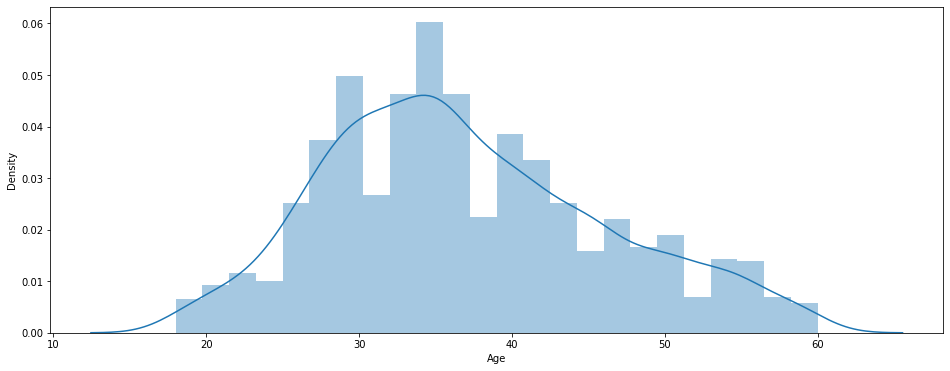

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df['Age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


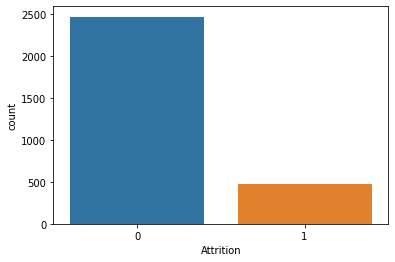

In [ ]:
sns.countplot('Attrition',data=df)

In [ ]:
print('Attrition percent in company is:',(df['Attrition'].value_counts()[1]/df['Attrition'].count())*100)

Attrition percent in company is: 16.122448979591837


In [ ]:
df['Department'].value_counts()

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64

               Department  Attrition
0         Human Resources         24
1  Research & Development        266
2                   Sales        184


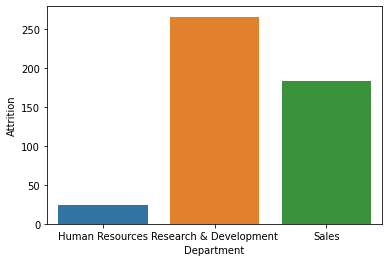

In [ ]:
dept=pd.DataFrame(df.groupby('Department')['Attrition'].sum())
dept
dept.reset_index(inplace=True)
sns.barplot(x='Department',y='Attrition',data=dept)
print(dept)


In [ ]:
md=pd.read_csv('/content/HR_Employee_Attrition_Data.csv')

In [ ]:
departmentgrp = md.groupby(by = 'Department')
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])
#attrbydept.reset_index(inplace = True)
attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]
print(attrbydept)

#Insight 2
"""Attrition is highest in Sales team closely followed by HR team"""

  Department  Attrition
0      Sales  20.627803
1         HR  19.047619
2        R&D  13.839750


'Attrition is highest in Sales team closely followed by HR team'

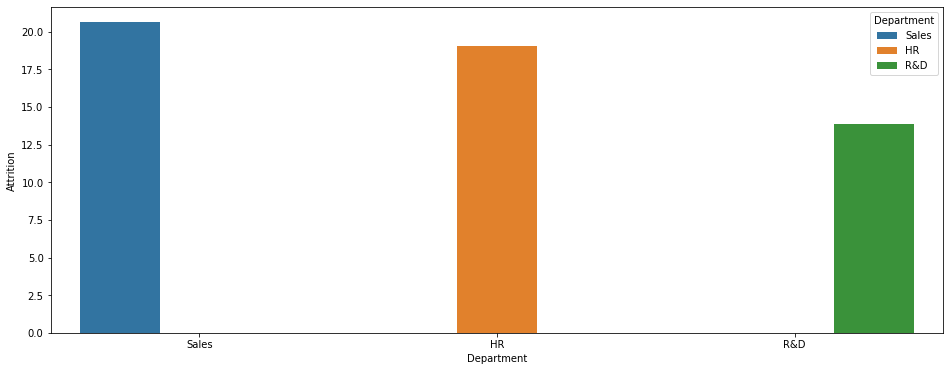

In [ ]:
#Plotting Attrition% for each department
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

In [ ]:
#Getting the count of Business travel based on Department
#HR
departmentgrp = df.groupby(by = 'Department')

df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [ ]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
df2.loc[df2['Department'] != 'HR', 'Department'] = 'R&D' 
df3 = df1.append(df2, ignore_index=True)
df3


,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D


In [ ]:
#sales
df2 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,630,Sales
7,Travel_Frequently,168,Sales
8,Non-Travel,94,Sales


In [ ]:
#Calculating % of frequent travel employees in Sales and R&D
print("% of frequent travel in Sales is::",(df4.loc[((df4['Department'] == 'Sales') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
print("% of frequent travel in R&D is ::",(df4.loc[((df4['Department'] == 'R&D') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))


% of frequent travel in Sales is:: 0.18834080717488788
% of frequent travel in R&D is :: 0.18938605619146723


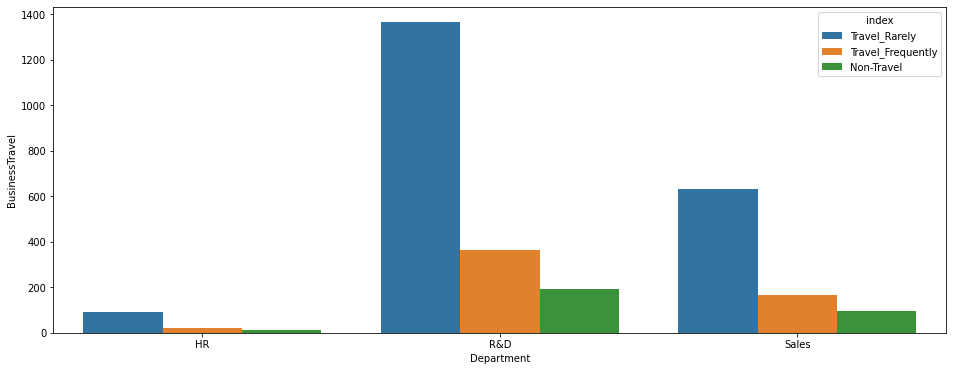

In [ ]:
#plotting department data against travel
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df4, hue = 'index')
plt.show()

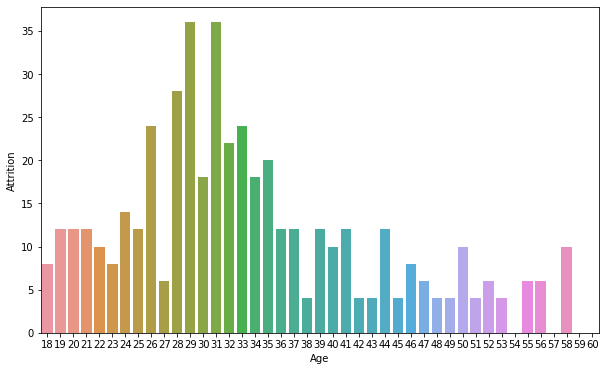

In [ ]:
#26-35 age group has high attrition
Age=pd.DataFrame(df.groupby('Age')['Attrition'].sum())
Age.reset_index(inplace=True)
plt.figure(figsize=[10,6])
sns.barplot(x='Age',y='Attrition',data=Age)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


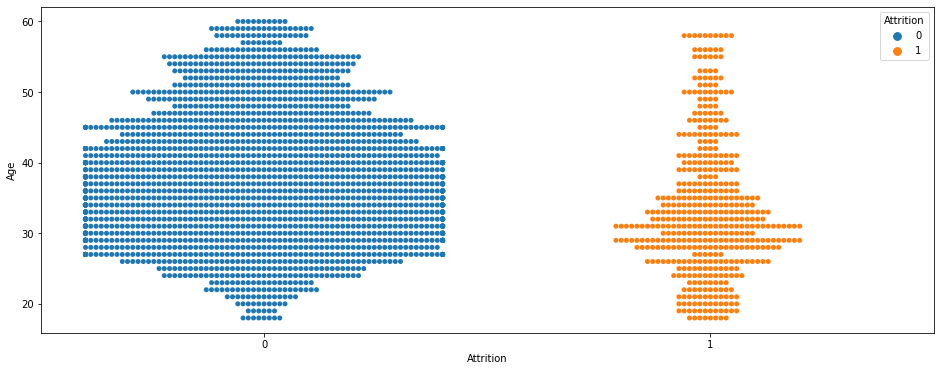

'"From the below plot we can see that there is NO linear relation between \'Age\' and \'Attrition\', \nbut bulk of the attrition is happening between the age groups of \'25-32\''

In [ ]:
#Check to see if there is any relation b/w Age and Attrition
plt.figure(figsize=(16,6))
sns.swarmplot(y='Age',x='Attrition',data=df,hue='Attrition')
plt.show()
""""From the below plot we can see that there is NO linear relation between 'Age' and 'Attrition', 
but bulk of the attrition is happening between the age groups of '25-32'"""

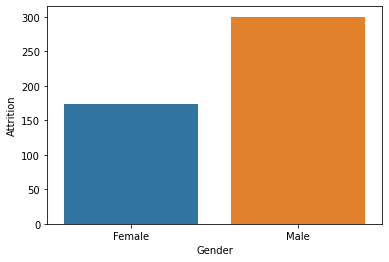

In [ ]:
Gender=pd.DataFrame(df.groupby('Gender')['Attrition'].sum())
Gender.reset_index(inplace=True)
sns.barplot(x='Gender',y='Attrition',data=Gender)

"""Out of total people who have left, Male's have higher attrition numbers"""

In [ ]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


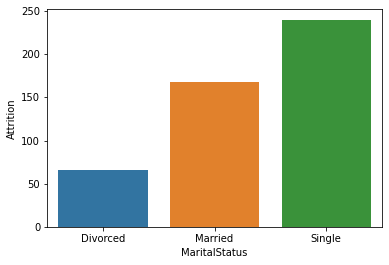

In [ ]:
MaritalStatus=pd.DataFrame(df.groupby('MaritalStatus')['Attrition'].sum())
MaritalStatus.reset_index(inplace=True)
sns.barplot(x='MaritalStatus',y='Attrition',data=MaritalStatus)

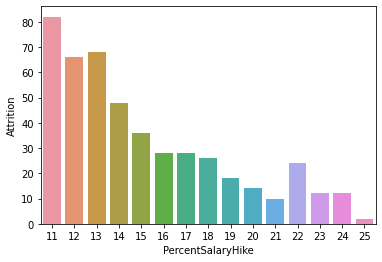

In [ ]:
PercentSalaryHike=pd.DataFrame(df.groupby('PercentSalaryHike')['Attrition'].sum())
PercentSalaryHike.reset_index(inplace=True)
sns.barplot(x='PercentSalaryHike',y='Attrition',data=PercentSalaryHike)
'''Most of the attrition is taking place where salary hike is below 15%'''

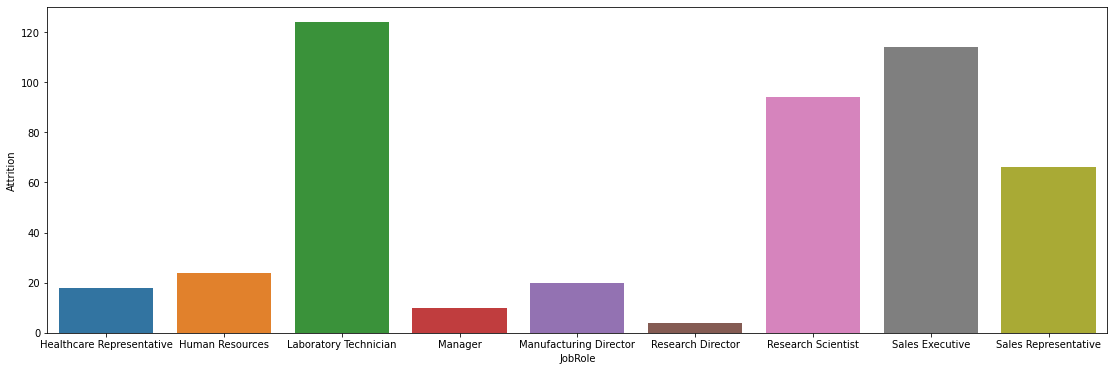

In [ ]:
JobRole=pd.DataFrame(df.groupby('JobRole')['Attrition'].sum())
JobRole.reset_index(inplace=True)
plt.figure(figsize=[19,6])
sns.barplot(x='JobRole',y='Attrition',data=JobRole)
'''Most of the attrition is taking place in Laboratory technician followed by sales executive'''

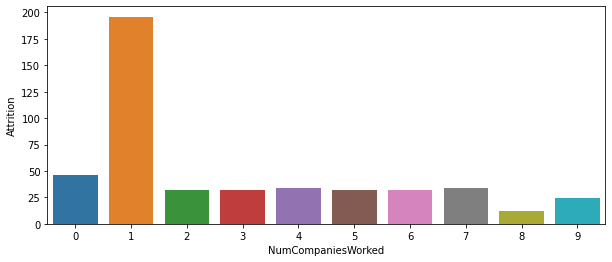

In [ ]:
NumCompaniesWorked=pd.DataFrame(df.groupby('NumCompaniesWorked')['Attrition'].sum())
NumCompaniesWorked.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='NumCompaniesWorked',y='Attrition',data=NumCompaniesWorked)
'''Most of the attrition is taking place where employee switched 1 company already'''

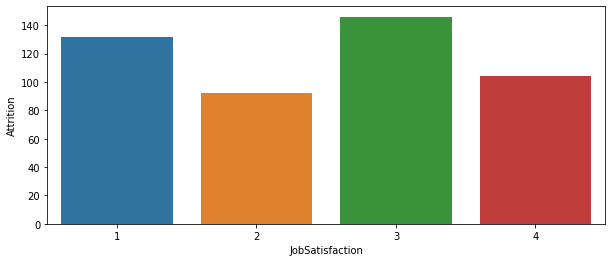

In [ ]:
# JobSatisfaction
JobSatisfaction=pd.DataFrame(df.groupby('JobSatisfaction')['Attrition'].sum())
JobSatisfaction.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='JobSatisfaction',y='Attrition',data=JobSatisfaction)
'''Most of the attrition is taking place where job satisfaction is 3 folled by 1'''

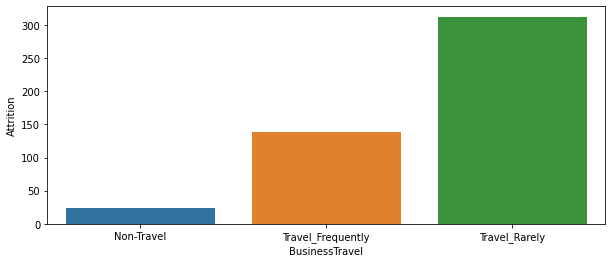

In [ ]:
BusinessTravel=pd.DataFrame(df.groupby('BusinessTravel')['Attrition'].sum())
BusinessTravel.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='BusinessTravel',y='Attrition',data=BusinessTravel)
'''Most of the attrition is taking place for people travelling rarely'''

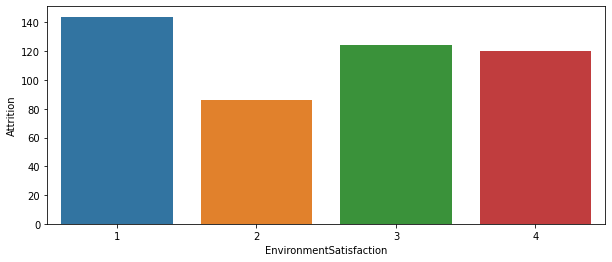

In [ ]:
EnvironmentSatisfaction=pd.DataFrame(df.groupby('EnvironmentSatisfaction')['Attrition'].sum())
EnvironmentSatisfaction.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='EnvironmentSatisfaction',y='Attrition',data=EnvironmentSatisfaction)
"""Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well."""

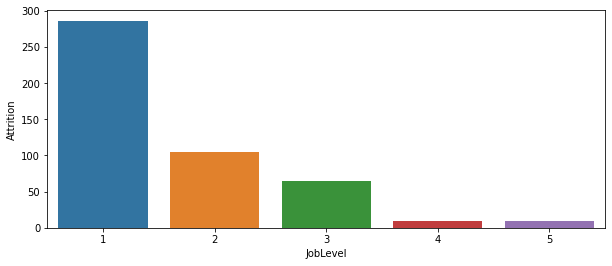

In [ ]:
JobLevel=pd.DataFrame(df.groupby('JobLevel')['Attrition'].sum())
JobLevel.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='JobLevel',y='Attrition',data=JobLevel)
'''Most of the attrition is taking place where job level is 1 as job level increases attrition decreases'''

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


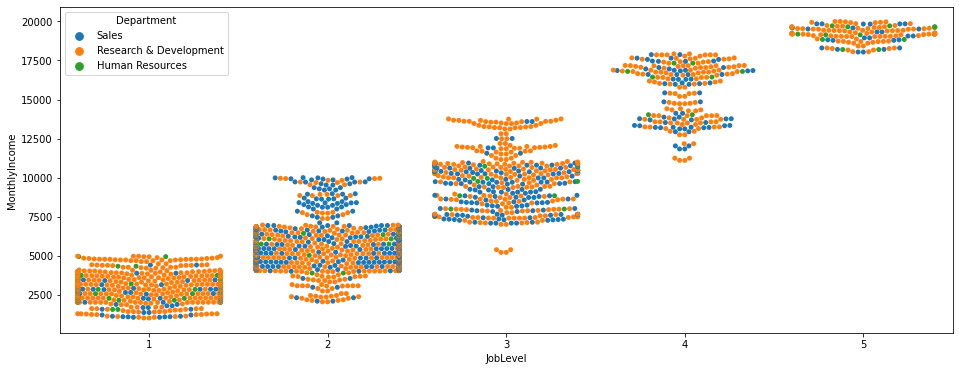

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x='JobLevel',y='MonthlyIncome',data=df,hue='Department')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


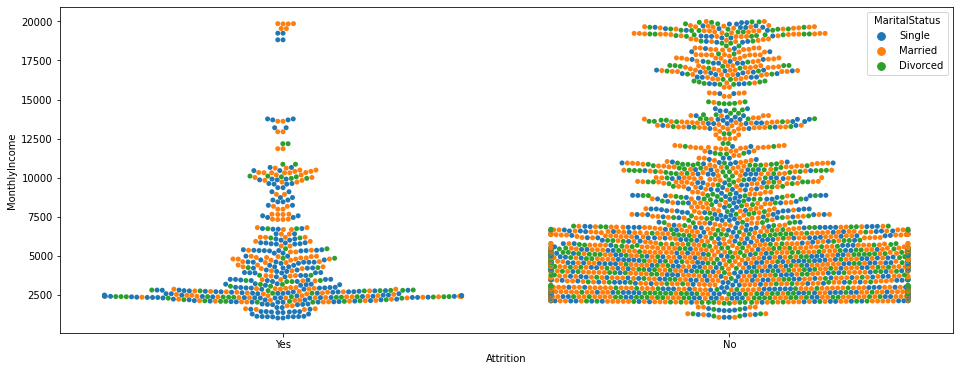

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=md,hue='MaritalStatus')
plt.show()

"""Attrition is highest amount employees who are earning between (2500-5000)"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

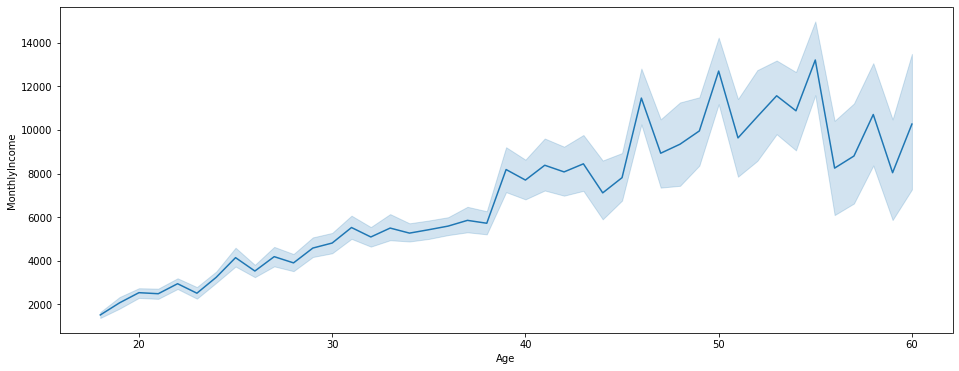

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot('Age',y='MonthlyIncome',data=df)
plt.show
"""There is a linear relation between Age and Monthly income"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

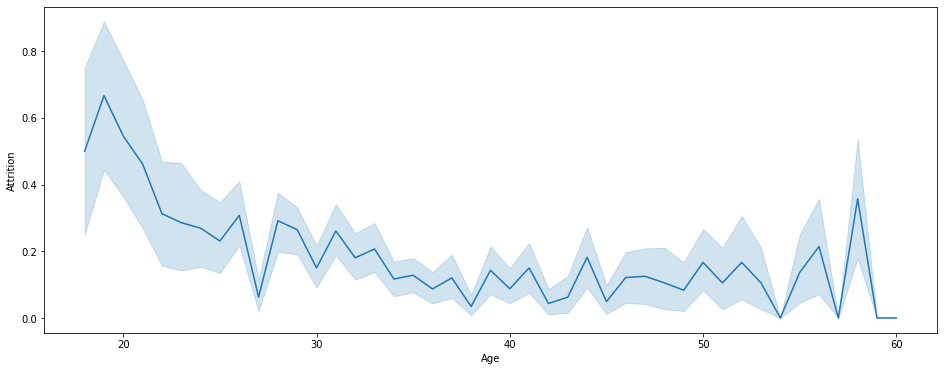

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot('Age',y='Attrition',data=df)
plt.show
"""There is a decreasing relation between Age and Attrition"""

<function matplotlib.pyplot.show>

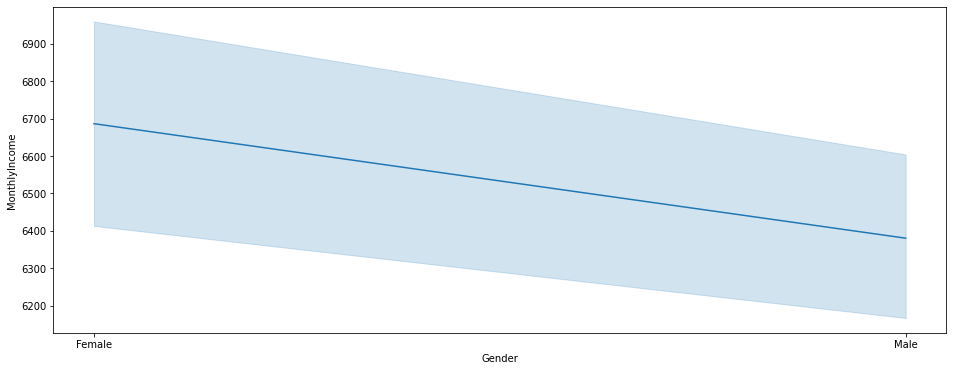

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x='Gender',y='MonthlyIncome',data=df)
plt.show
"""Monthly income for male is less then female"""

<function matplotlib.pyplot.show>

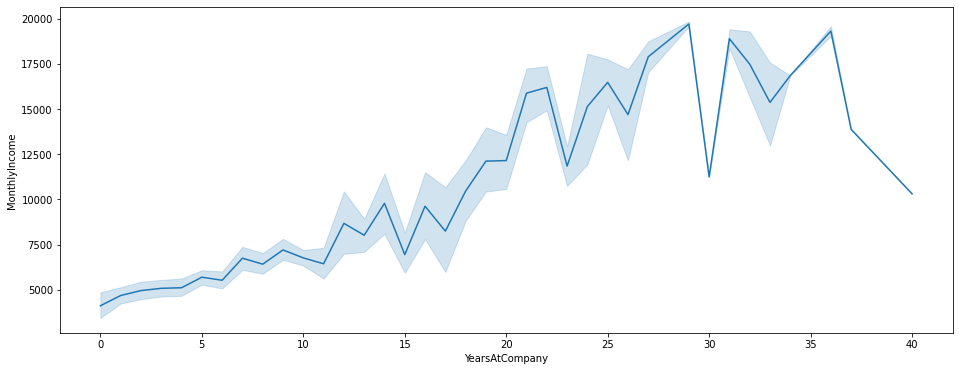

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x='YearsAtCompany',y='MonthlyIncome',data=df)
plt.show

<function matplotlib.pyplot.show>

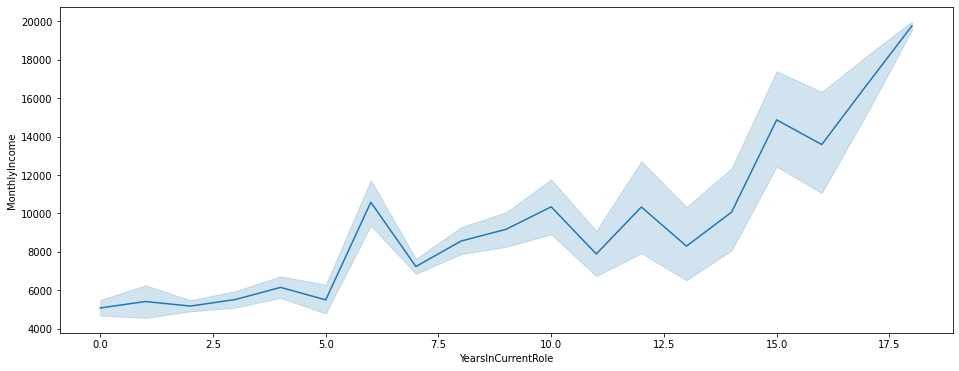

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x='YearsInCurrentRole',y='MonthlyIncome',data=df)
plt.show

<function matplotlib.pyplot.show>

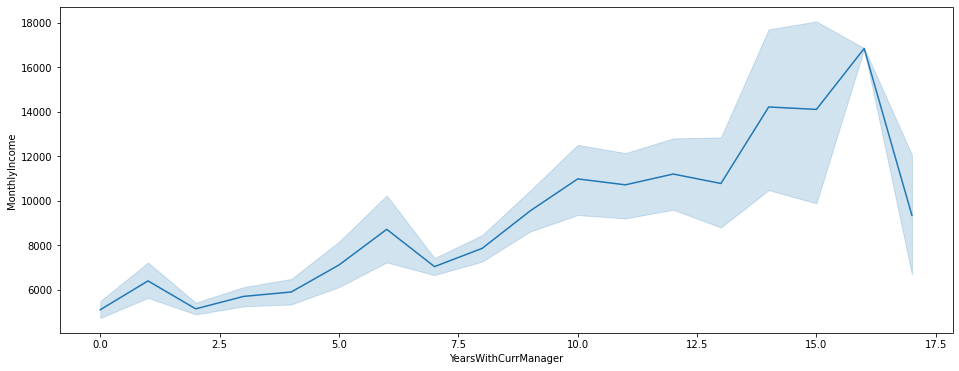

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(x='YearsWithCurrManager',y='MonthlyIncome',data=df)
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


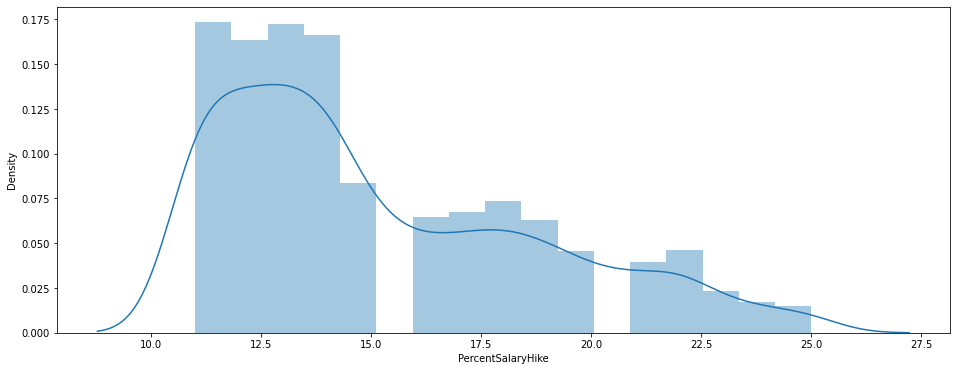

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df['PercentSalaryHike'],kde=True)
plt.show()
"""The salary hike histogram is skewed to the right""" 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


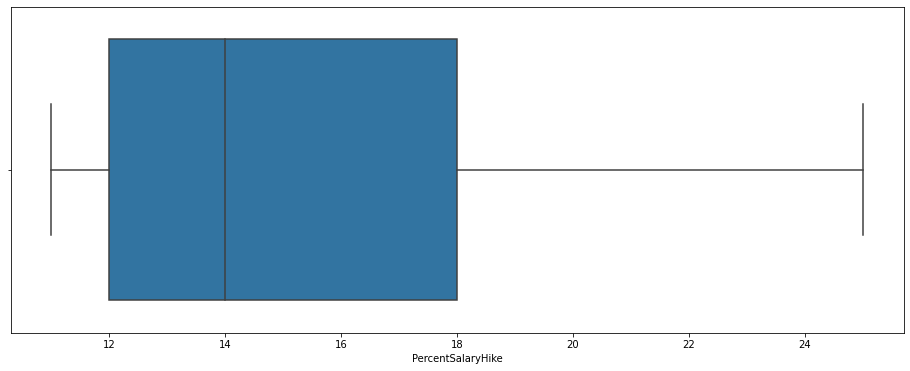

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot('PercentSalaryHike',data=df)
plt.show()
"""The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%""" 

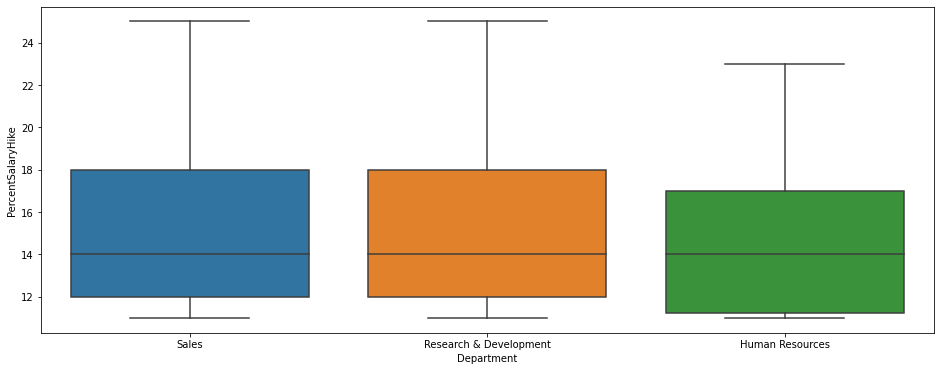

In [ ]:
#Plotting hike% for each department
plt.figure(figsize=(16,6))
sns.boxplot(y='PercentSalaryHike',x='Department',data=df)
plt.show()

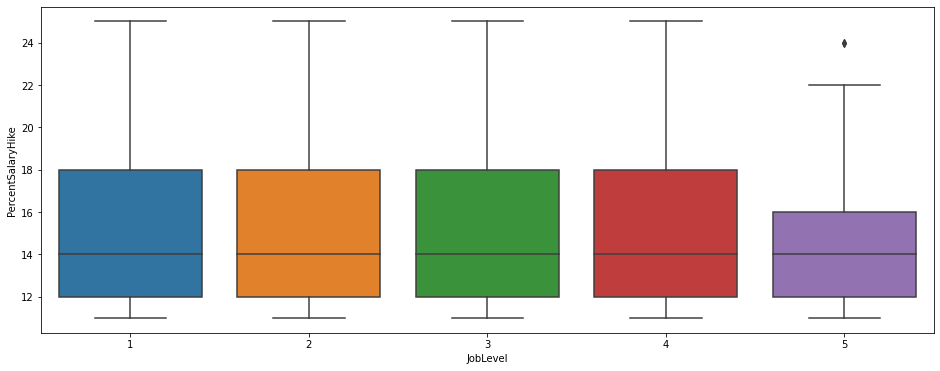

In [ ]:
#Plotting hike% for Job level
plt.figure(figsize=(16,6))
sns.boxplot(y='PercentSalaryHike',x='JobLevel',data=df)
plt.show()

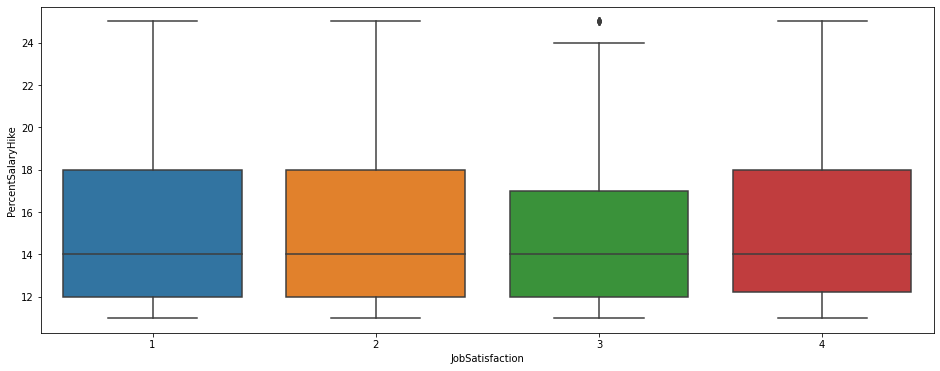

In [ ]:
#Plotting hike% for Job Satisfaction
plt.figure(figsize=(16,6))
sns.boxplot(y='PercentSalaryHike',x='JobSatisfaction',data=df)
plt.show()

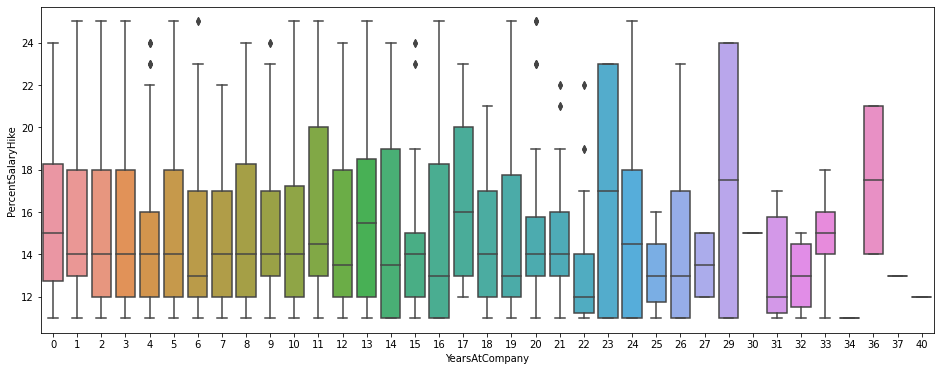

In [ ]:
#Plotting hike% for No of years worked
plt.figure(figsize=(16,6))
sns.boxplot(y='PercentSalaryHike',x='YearsAtCompany',data=df)
plt.show()

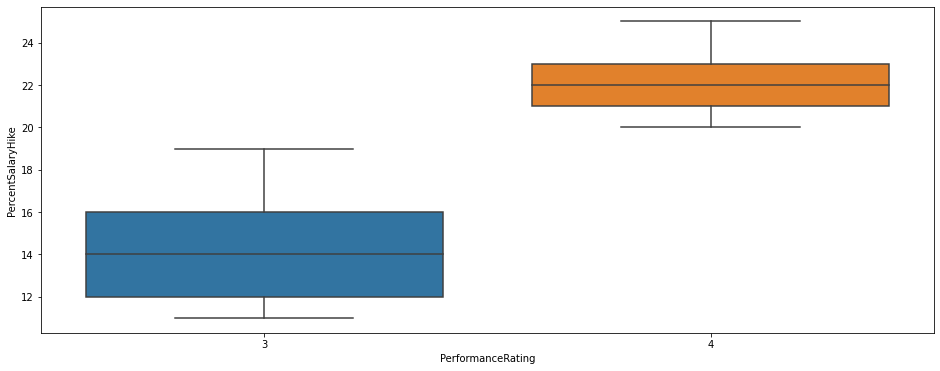

In [ ]:
#Plotting hike% for Performance rating
plt.figure(figsize=(16,6))
sns.boxplot(y='PercentSalaryHike',x='PerformanceRating',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


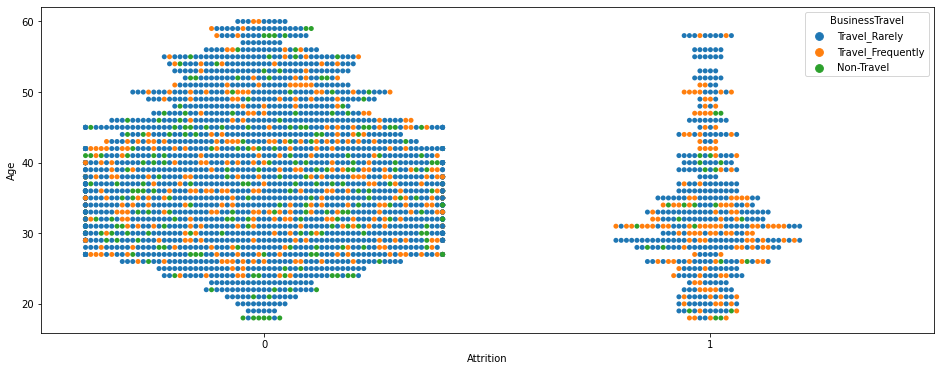

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x='Attrition',y='Age',data=df,hue='BusinessTravel')
plt.show()
#Insight 1
"""From the below plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more"""

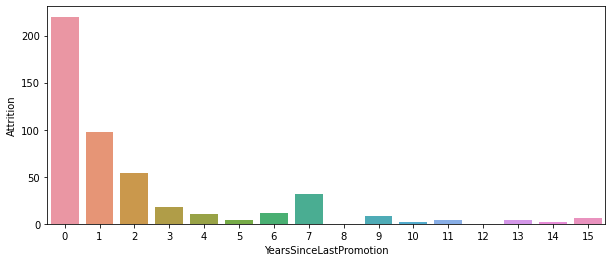

In [ ]:
YearsSinceLastPromotion=pd.DataFrame(df.groupby('YearsSinceLastPromotion')['Attrition'].sum())
YearsSinceLastPromotion.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='YearsSinceLastPromotion',y='Attrition',data=YearsSinceLastPromotion)

"""Attrition is more for people with years from promotion<2""" 

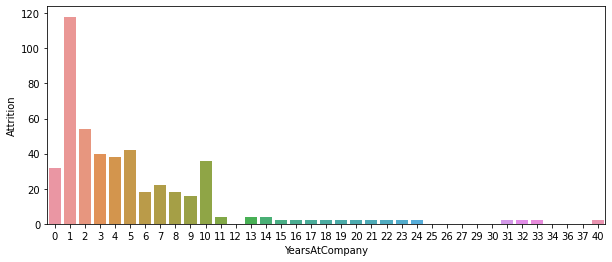

In [ ]:
YearsAtCompany=pd.DataFrame(df.groupby('YearsAtCompany')['Attrition'].sum())
YearsAtCompany.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='YearsAtCompany',y='Attrition',data=YearsAtCompany)
"""Attrition is more for people with exp<4""" 

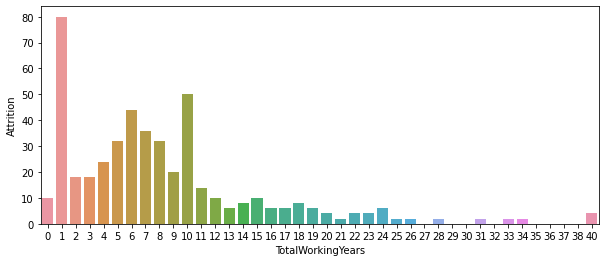

In [ ]:
# TotalWorkingYears
TotalWorkingYears=pd.DataFrame(df.groupby('TotalWorkingYears')['Attrition'].sum())
TotalWorkingYears.reset_index(inplace=True)
plt.figure(figsize=[10,4])
sns.barplot(x='TotalWorkingYears',y='Attrition',data=TotalWorkingYears)
"""Attrition is more for people with years total ep<6""" 

In [ ]:
#checking the correlation between columns
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.005175,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.005184,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.025742,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.016464,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.020950,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005175,-0.005184,-0.025742,0.016464,0.020950,NaN,1.000000,0.008712,0.017377,-0.003552,-0.009020,-0.022970,-0.007188,0.006177,-0.000345,-0.006685,-0.010338,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.008712,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.017377,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.003552,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


In [ ]:
#importing libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve,auc,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'
def Labelencoder(df):
  temp_df=df.copy()
  le=preprocessing.LabelEncoder()
  temp_df['BusinessTravel']=le.fit_transform(temp_df['BusinessTravel'])
  temp_df['Department']=le.fit_transform(temp_df['Department'])
  temp_df['EducationField']=le.fit_transform(temp_df['EducationField'])
  temp_df['Gender']=le.fit_transform(temp_df['Gender'])
  temp_df['JobRole']=le.fit_transform(temp_df['JobRole'])
  temp_df['MaritalStatus']=le.fit_transform(temp_df['MaritalStatus'])
  temp_df['OverTime']=le.fit_transform(temp_df['OverTime'])
  temp_df['Over18']=le.fit_transform(temp_df['Over18'])

  return temp_df

encoded_data=Labelencoder(df)

In [ ]:
x=encoded_data.drop(['Attrition','StandardHours','EmployeeCount'],axis=1)
y=encoded_data['Attrition'].values
# dropping StandardHours,EmployeeCount as there is no variation in the column

In [ ]:
encoded_data['BusinessTravel'].value_counts()

2    2086
1     554
0     300
Name: BusinessTravel, dtype: int64

In [ ]:
#splitiing data into x,y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
#categorizing data into numerical and categorical
num=x.select_dtypes(include='number')
char=x.select_dtypes(include='object')

In [ ]:
#shape of data
x_train.shape,x_test.shape,y_train.shape

((2058, 32), (882, 32), (2058,))

In [ ]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1804,45,2,549,1,8,4,4,1805,4,1,75,3,2,6,4,1,3697,9278,9,0,0,14,3,1,2,12,3,3,10,9,9,8
1014,31,2,182,1,8,5,1,1015,1,0,93,3,4,5,2,2,16422,8847,3,0,0,11,3,3,0,9,3,4,3,2,1,0
1327,46,2,1319,2,3,3,5,1328,1,0,45,4,4,7,1,0,13225,7739,2,0,0,12,3,4,1,25,5,3,19,17,2,8
2462,39,0,1485,1,25,2,1,2463,3,1,71,3,3,0,3,1,10920,3449,3,0,0,21,4,2,1,13,2,3,6,4,0,5
2304,34,2,1400,2,9,1,1,2305,2,0,70,3,2,7,3,1,5714,5829,1,0,0,20,4,1,0,6,3,2,6,5,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,857,1,10,3,1,148,4,1,91,2,4,3,1,0,17181,12888,4,0,0,13,3,2,1,21,2,2,7,6,7,7
1593,51,2,684,1,6,3,1,1594,1,1,51,3,5,5,3,2,19537,6462,7,0,0,13,3,3,0,23,5,3,20,18,15,15
2807,28,2,1172,2,3,3,3,2808,2,0,78,3,1,8,2,1,2856,3692,1,0,0,19,3,4,1,1,3,3,1,0,0,0
75,31,2,746,1,8,4,1,76,3,0,61,3,2,4,4,2,4424,20682,1,0,0,23,4,4,0,11,2,3,11,7,1,8


In [ ]:
#using parameter hypertuning for decision tree to get best hyperparameters
from sklearn.model_selection import GridSearchCV
import time
fit_rf=DecisionTreeClassifier()
start=time.time()
depth = np.arange(1,30)
leaves = [1,2,4,5,10,20,30,40,80,100]
param_grid =[{'max_depth':depth,
             'min_samples_leaf':leaves,
             'min_samples_split':leaves}]
cv_rf=GridSearchCV(fit_rf,cv=10,
                   param_grid=param_grid)
cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  465.72


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2900 fits failed out of a total of 29000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a 

In [ ]:
tree=DecisionTreeClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=2)
tree.fit(x_train,y_train)
tree_score=tree.score(x_train,y_train)
tree_score1=tree.score(x_test,y_test)
print('training accuracy:',tree_score)
print('testing accuracy:',tree_score1)

training accuracy: 1.0
testing accuracy: 0.9455782312925171


In [ ]:
from sklearn import metrics

y_pred_tree=tree.predict(x_test)
print('accuracy: ',metrics.accuracy_score(y_test,y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

accuracy:  0.9455782312925171
Precision 0.8079470198675497
Recall 0.8652482269503546
f1_score 0.8356164383561644


In [ ]:
y_pred_prob = tree.predict_proba(x_test)[:, 1]
y_pred_prob

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [ ]:
#Predicting the Attrition for X_test
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

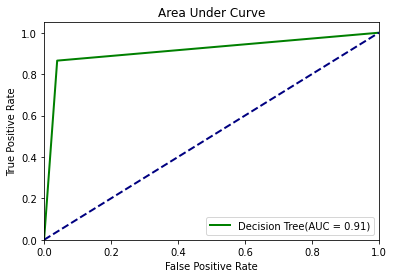

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_score=rf.score(x_train,y_train)
rf_score1=rf.score(x_test,y_test)
# print('training,testing',rf_score,rf_score1)
print('training accuracy:',rf_score)
print('testing accuracy:',rf_score1)

training accuracy: 1.0
testing accuracy: 0.963718820861678


In [ ]:
y_pred_rf=rf.predict(x_test)
print('accuracy: ',metrics.accuracy_score(y_test,y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

accuracy:  0.963718820861678
Precision 0.9739130434782609
Recall 0.7943262411347518
f1_score 0.8750000000000001


In [ ]:
y_pred_prob = rf.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.06, 0.14, 0.82, 0.1 , 0.04, 0.  , 0.23, 0.11, 0.18, 0.1 , 0.06,
       0.04, 0.08, 0.34, 0.45, 0.06, 0.14, 0.04, 0.09, 0.82, 0.04, 0.75,
       0.09, 0.6 , 0.62, 0.04, 0.18, 0.36, 0.02, 0.02, 0.03, 0.04, 0.05,
       0.24, 0.07, 0.11, 0.74, 0.66, 0.83, 0.04, 0.02, 0.16, 0.06, 0.21,
       0.06, 0.01, 0.08, 0.06, 0.07, 0.62, 0.03, 0.09, 0.45, 0.05, 0.22,
       0.1 , 0.12, 0.05, 0.74, 0.  , 0.01, 0.68, 0.05, 0.24, 0.04, 0.13,
       0.05, 0.06, 0.09, 0.06, 0.19, 0.1 , 0.08, 0.  , 0.48, 0.43, 0.02,
       0.14, 0.05, 0.02, 0.18, 0.02, 0.15, 0.1 , 0.04, 0.03, 0.11, 0.03,
       0.09, 0.07, 0.07, 0.9 , 0.02, 0.13, 0.12, 0.19, 0.01, 0.66, 0.02,
       0.1 , 0.02, 0.14, 0.83, 0.07, 0.04, 0.05, 0.05, 0.1 , 0.66, 0.17,
       0.03, 0.03, 0.08, 0.02, 0.03, 0.02, 0.06, 0.13, 0.07, 0.11, 0.1 ,
       0.13, 0.55, 0.  , 0.07, 0.27, 0.18, 0.08, 0.  , 0.09, 0.15, 0.19,
       0.06, 0.04, 0.05, 0.05, 0.02, 0.08, 0.14, 0.09, 0.01, 0.03, 0.03,
       0.04, 0.03, 0.11, 0.75, 0.16, 0.01, 0.02, 0.

In [ ]:
#Area under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

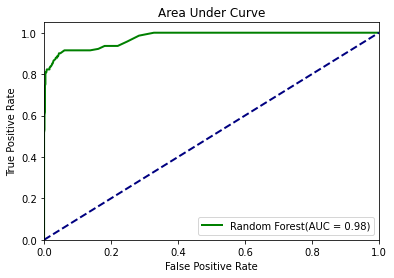

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

[[712  29]
 [ 19 122]]


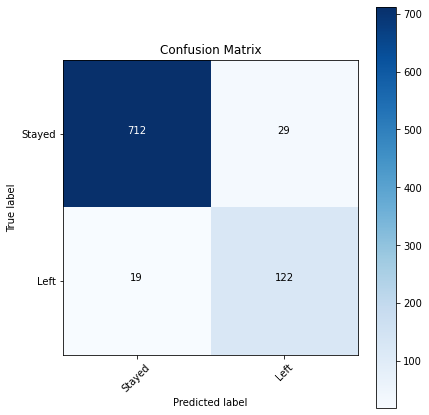

In [ ]:
#Printing confusion matrix
print (confusion_matrix(y_test, y_pred))
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
from sklearn.svm import SVC
# from sklearn import metrics
print('------------------poly-------------------------')
svc=SVC(kernel='poly',gamma=0.03) #Default hyperparameters
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)
svc_score=svc.score(x_train,y_train)
svc_score1=svc.score(x_test,y_test)
print('training,testing',svc_score,svc_score1)
print('accuracy: ',metrics.accuracy_score(y_test,y_pred_svm))
print("Precision",metrics.precision_score(y_test,y_pred_svm))
print("Recall",metrics.recall_score(y_test,y_pred_svm))
print("f1_score",metrics.f1_score(y_test,y_pred_svm))
print('------------------linear-------------------------')
svc=SVC(kernel='linear',gamma=0.03) #Default hyperparameters
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)
svc_score=svc.score(x_train,y_train)
svc_score1=svc.score(x_test,y_test)
print('training,testing',svc_score,svc_score1)
print('accuracy: ',metrics.accuracy_score(y_test,y_pred_svm))
print("Precision",metrics.precision_score(y_test,y_pred_svm))
print("Recall",metrics.recall_score(y_test,y_pred_svm))
print("f1_score",metrics.f1_score(y_test,y_pred_svm))
print('------------------rbf-------------------------')
svc=SVC(kernel='rbf',gamma=0.03) #Default hyperparameters
svc.fit(x_train,y_train)
y_pred_svm=svc.predict(x_test)
svc_score=svc.score(x_train,y_train)
svc_score1=svc.score(x_test,y_test)
print('training,testing',svc_score,svc_score1)
print('accuracy: ',metrics.accuracy_score(y_test,y_pred_svm))
print("Precision",metrics.precision_score(y_test,y_pred_svm))
print("Recall",metrics.recall_score(y_test,y_pred_svm))
print("f1_score",metrics.f1_score(y_test,y_pred_svm))

------------------poly-------------------------


In [ ]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear','rbf','poly'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly','rbf','linear']
                   }
fit_rf= GridSearchCV(svc,param_grid=tuned_parameters,cv=10)
fit_rf.fit(x_train, y_train)

print(fit_rf.best_params_)

In [ ]:
print(svc.get_params().keys())